<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Teoría de Circuitos II

# Problema desafío



Se pide diseñar un filtro pasabajo que satisfaga la siguiente plantilla:

 * $\omega_p  = 500$ Hz
 * $\omega_s  = 1500$ Hz
 * $\alpha_{max}  = 1$ dB
 * $\alpha_{min}  = 18$ dB

a) Determine si el siguiente diseño puede realizarse con una sola sección de segundo orden cuya respuesta de módulo es de **máxima planicidad**.



#### normalizo la frecuencia

\begin{equation}
\omega_p =\Omega_w = 500 Hz \rightarrow omega_p = 1.
\end{equation}

\begin{equation}
\omega'_s = \frac{\omega_s}{\Omega_w} = 3
\end{equation}


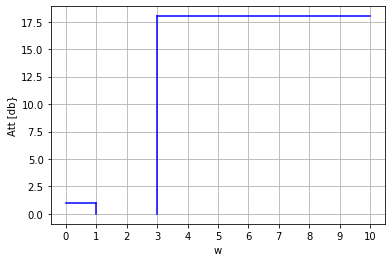

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


alfa_max = 1
alfa_min = 18
Wp = 1
Ws = 3


## Ploteo Plantilla pasa Bajos

w_banda_paso = np.linspace(0, Wp)
w_banda_att = np.linspace(Ws, 10)  

# Lineas verticales para mejor visualizacion
vertical_banda_paso = np.linspace(0, alfa_max)
vertical_banda_att = np.linspace(0, alfa_min)

# Ploteo


fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False)
ax.set_ylabel('Att [db}')
ax.set_xlabel('w')
ax.grid(True)
ticks = range(0, 11)
ax.set_xticks(ticks)
ax.plot(w_banda_paso, [alfa_max] * len(w_banda_paso), '-b')
ax.plot(w_banda_att, [alfa_min] * len(w_banda_att), '-b')
ax.plot([1] * len(vertical_banda_paso), vertical_banda_paso, '-b')
ax.plot([Ws] * len(vertical_banda_att), vertical_banda_att, '-b')

plt.show()

#### calculo n para $\alpha_{min} > 18$dB - Maxima Planicidad

\begin{equation}
\varepsilon^2 = 10^{\alpha_{max}.0,1}-1
\end{equation}

\begin{equation}
\alpha = 10.log(1+\varepsilon^2.{\omega'_s}^{2.n})
\end{equation}

Itero $n$ hasta que $\alpha > \alpha_{min}$

In [2]:

ee = 10**(alfa_max/10)-1

for n in range(2,4):
    
    alfa_min = 10*np.log10(1 + ee * Ws**(2*n))
    
    print( 'n {:d} - alfa_min {:f}'.format(n, alfa_min) )



n 2 - alfa_min 13.418885
n 3 - alfa_min 22.781969



<table class="egt">
  <tr>
    <th>n</th>
    <th>$\alpha_{min}$</th>
  </tr>
  <tr>
    <td>2</td>
    <td>13.419</td>
  </tr>
  <tr>
    <td>3</td>
    <td>22.782</td>
  </tr>
</table>


 Se necesita un filtro de $3^{er}$ orden para satisfacer los requerimientos con **máxima planicidad**
 

b) Si el mismo diseño se planteara mediante una aproximación **Chebyshev**, se pide:
 
   * la función transferencia normalizada
   * las respuestas de módulo, fase y la localización de polos y ceros


#### calculo n para $\alpha_{min} > 18$dB - Chebyshev

\begin{equation}
\varepsilon^2 = 10^{\alpha_{max}.0,1}-1
\end{equation}

\begin{equation}
\alpha = 10.log{\{1+\varepsilon^2.\cosh^2 [n.\cosh^{-1}(\omega'_s)]\}}
\end{equation}

Itero $n$ hasta que $\alpha > \alpha_{min}$

In [3]:

ee = 10**(alfa_max/10)-1

for n in range(2,4):
    
    alfa_min = 10*np.log10(1 + ee * np.cosh(n * np.arccosh(Ws))**2 )
    
    print( 'n {:d} - alfa_min {:f}'.format(n, alfa_min) )



n 2 - alfa_min 18.798379
n 3 - alfa_min 34.046162



<table class="egt">
  <tr>
    <th>n</th>
    <th>$\alpha_{min}$</th>
  </tr>
  <tr>
    <td>2</td>
    <td>18.798</td>
  </tr>
  <tr>
    <td>3</td>
    <td>34.046</td>
  </tr>
</table>


 Se necesita un filtro de $2^{o}$ orden para satisfacer los requerimientos con **Chebyshev**
 

#### Transferencia Chebyshev

\begin{equation}
|T_c|^2 = \frac{1}{1+\varepsilon^2.C_n^2(\omega)}
\end{equation}

\begin{equation}
C_n(\omega)= 2.\omega.C_{n-1}-C_{n-2}
\end{equation}

\begin{equation}
C_0(\omega)= 1
\end{equation}

\begin{equation}
C_1(\omega)= \omega
\end{equation}

\begin{equation}
C_2(\omega)= 2.\omega.\omega-1 = 2.\omega^2-1
\end{equation}


\begin{equation}
si: n = 2
\end{equation}

\begin{equation}
|T_c|^2 = \frac{1}{1+\varepsilon^2(2.\omega^2-1)^2}
\end{equation}

\begin{equation}
|T_c|^2 = \frac{1}{1+\varepsilon^2(4.\omega^4-4.\omega^2+1)}
\end{equation}

\begin{equation}
|T_c|^2 = \frac{1}{\varepsilon^2.4.\omega^4-\varepsilon^2.4.\omega^2+(1+\varepsilon^2)}
\end{equation}

\begin{equation}
|T_c|^2_{w=\frac{s}{j}} = \frac{1}{\varepsilon^2.4.(\frac{s}{j})^4-\varepsilon^2.4.(\frac{s}{j})^2+(1+\varepsilon^2)}
\end{equation}

\begin{equation}
|T_c|^2_s = \frac{1}{S^4.\varepsilon^2.4+S^2.\varepsilon^2.4+(1+\varepsilon^2)}
\end{equation}

\begin{equation}
|T_c|^2_s = T_s.T_{-s}
\end{equation}

\begin{equation}
|T_c|^2_s = \frac{1}{S^4.\varepsilon^2.4+S^2.\varepsilon^2.4+(1+\varepsilon^2)} = \frac{1}{S^2.a+S.b+c}.\frac{1}{S^2.a-S.b+c}
\end{equation}

\begin{equation}
\varepsilon^2.4 = a^2 \rightarrow a = 2.\varepsilon
\end{equation}

\begin{equation}
\varepsilon^2.4 = 2.a.c -b^2 \rightarrow b = \sqrt{2.a.c - \varepsilon^2.4}
\end{equation}

\begin{equation}
1+\varepsilon^2 = c^2 \rightarrow c = \sqrt{1+\varepsilon^2}
\end{equation}


T_s =\frac{c}{S^2.a+S.b+c}


In [4]:

e = np.sqrt(ee)
a = 2*e
c = np.sqrt(1+ee)
b = np.sqrt(2*a*c - ee*4)

print( 'a = {:f}'.format(a) )
print( 'b = {:f}'.format(b) )
print( 'c = {:f}'.format(c) )

a = 1.017694
b = 1.117158
c = 1.122018


#### Finalmente:

Multiplico por $c$ para que la ganancia en continua sea 1

\begin{equation}
T_s = \frac{c}{S^2.a+S.b+c}
\end{equation}

\begin{equation}
T_s = \frac{1.122}{S^2.1,018+S.1.117+1.122}
\end{equation}

\begin{equation}
T_s = \frac{1.122}{S^2.1,018+S.1.117+1.122}
\end{equation}

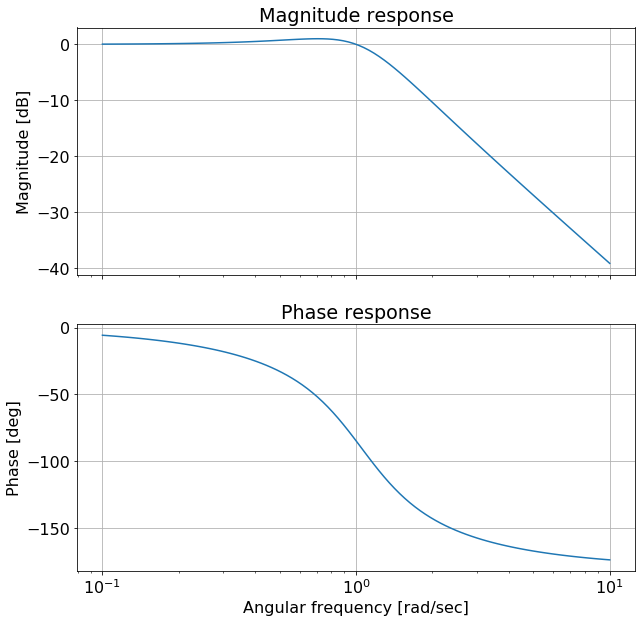

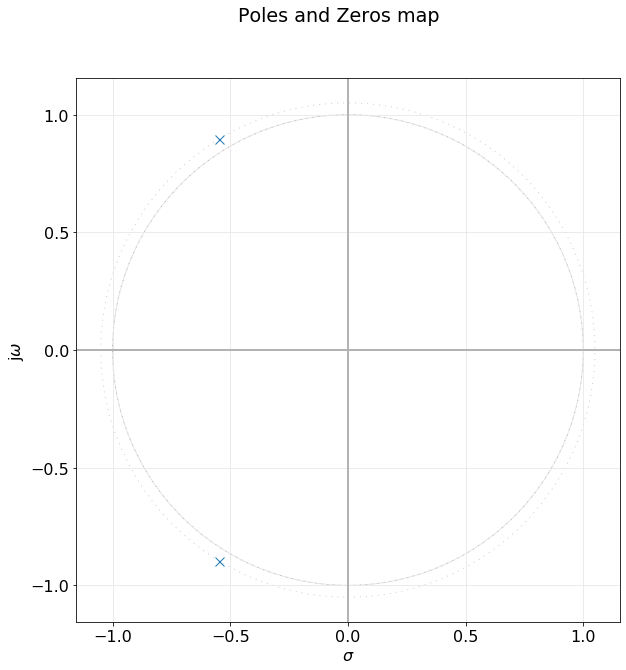

In [25]:
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi
fig_font_family = 'Sans'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

# módulo de SciPy
from scipy import signal as sig


# un módulo adaptado a mis necesidades
from splane import bodePlot, pzmap
        
# Definimos los parámetros de la transferencia:

# O bien en términos de los parámetros w0 y Q

w0 = 1
Q = 5

# Cargamos la función transferencia

num = np.array([ c ])
den = np.array([ a, b, c ])


H = sig.TransferFunction( num, den )

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el módulo y la fase.

_, axes_hdl = bodePlot(H)


# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
#plt.sca(axes_hdl[0])
#plt.ylim([-1,1])

plt.gca

pzmap(H)

plt.show()


c) Implemente el filtro solicitado mediante la siguiente red y corrobore su funcionamiento respecto a la plantilla de requerimientos.

  <img src="./ACKMOSS.png" align="center" width="80%" /> 
 
 

\begin{equation}
\left\lbrace
\begin{array}{ll}
0 = V_a(\frac{K}{R}+\frac{1}{R_1}+\frac{1}{QR}+SC)-V_1\frac{K}{R}+V_2\frac{1}{R_1}-V_3(\frac{1}{QR}+SC))\\
0 = V_b(\frac{1}{R_1}+SC)-V_3\frac{1}{R_1}-V_4SC\\
0 = Vc(\frac{1}{R}+\frac{1}{R})-V_2\frac{1}{R}-V_4\frac{1}{R}\\
V_a = V_b = V_c = 0v
\end{array}
\right.
\end{equation}

\begin{equation}
\Rightarrow \left\lbrace
\begin{array}{ll}
0 = V_1\frac{K}{R}+V_2\frac{1}{R_1}+V_3(\frac{1}{QR}+SC)\\
0 = V_3\frac{1}{R_1}+V_4SC \Rightarrow V_3 = - V_2 SCR_1\\
0 = V_2\frac{1}{R}+V_4\frac{1}{R} \Rightarrow V_4 = -V_2 
\end{array}
\right.
\end{equation}


\begin{equation}
V_2\frac{1}{R_1}-V_2 SCR_1(\frac{1+SCRQ}{QR})) = -V_1\frac{K}{R}
\end{equation}

\begin{equation}
V_2( (\frac{1}{R_1}-\frac{SCR_1+S^2C^2R_1RQ}{QR}) = -V_1\frac{K}{R}
\end{equation}

\begin{equation}
V_2( (\frac{QR-SCR_1^2-S^2C^2R_1^2RQ}{QR_1}) = -V_1\frac{K}{1}
\end{equation}


\begin{equation}
\frac{V_2}{V_1}  = - \frac{KQR_1}{QR+SCR_1^2+S^2C^2R_1^2RQ}
\end{equation}

\begin{equation}
\frac{V_2}{V_1}  = -\frac{KR_1}{C^2R_1^2R}.\frac{1}{S^2+S\frac{1}{CRQ}+\frac{1}{C^2R_1^2}}
\end{equation}

\begin{equation}
\frac{V_2}{V_1}  = \frac{K_x \omega_0^2}{S^2+S\frac{\omega_x}{Q}+\omega_0^2}
\end{equation}


\begin{equation}
\frac{V_2}{V_1}  = -\frac{KR_1}{R}.\frac{\frac{1}{C^2R_1^2}}{S^2+S\frac{1}{CRQ}+\frac{1}{C^2R_1^2}}
\end{equation}

\begin{equation}
T_s = \frac{\frac{c}{a}}{S^2+S.\frac{b}{a}+\frac{c}{a}}
\end{equation}

\begin{equation}
\frac{c}{a} = \frac{1}{C^2R_1^2} \rightarrow si: C=1 \Rightarrow R_1  = \sqrt{\frac{a}{c}}
\end{equation}

\begin{equation}
\frac{b}{a} = \frac{1}{CRQ} \rightarrow si: C = 1 y R = 1 \Rightarrow Q  = \frac{a}{b}
\end{equation}

\begin{equation}
\frac{kR1}{R} = 1 \rightarrow si: R = 1 \Rightarrow K  = \frac{1}{R_1} = \sqrt{\frac{c}{a}}
\end{equation}

In [20]:
R_1n = np.sqrt(c/a)
Q = a/b
K = np.sqrt(a/c)
print('R_1n = {:f}'.format(R_1n) )
print('Q = {:f}'.format(Q) )
print('K = {:f}'.format(K) )
Rn = 1000
Cnw = 1
Wn=500
Cn = Cnw / Wn
print('C = {:f}'.format(C) )

R = 1 * Rn
C = Cn / Rn
R_1 = R_1n * Rn
QR = Q * R
R_K = R / K

print('R = {:f}'.format(R) )
print('C = {:f}'.format(C) )
print('R_1 = {:f}'.format(R_1) )
print('QR = {:f}'.format(QR) )
print('R/K = {:f}'.format(R_K) )

R_1n = 1.050005
Q = 0.910967
K = 0.952376
C = 0.000002
R = 1000.000000
C = 0.000002
R_1 = 1050.004918
QR = 910.967229
R/K = 1050.004918



<img src="./Simulacion_1.JPG" align="center" width="70%" /> 

<img src="./Simulacion_2.JPG" align="center" width="100%" /> 

<img src="./Simulacion_3.JPG" align="center" width="150%" /> 
